# 고객 유형 분류
## KMeans Clustering

고객 정보와 수입, 소비 데이터를 활용하여 
KMeans Clustering을 통해 유형을 분류한다. 

## 모듈 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col = 0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## 카테고리 변수 처리

In [6]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [7]:
df['Gender_Male'] = df['Gender_Male'].astype('int64')
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


## KMeans Clustering 모델링

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=3)

In [10]:
model.fit(df)

KMeans(n_clusters=3)

In [11]:
model.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2])

## 분석 결과 Summary

In [12]:
result_df = df.copy()

In [13]:
result_df['label'] = model.labels_

In [14]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,1
4,23,16,77,0,0
5,31,17,40,0,0
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,2
198,32,126,74,1,2


In [15]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,25.771429,29.971429,68.514286,0.428571
1,44.483871,59.879032,35.427419,0.435484
2,32.975610,88.731707,79.243902,0.463415


In [16]:
result_df['label'].value_counts()

label
1    124
2     41
0     35
Name: count, dtype: int64

## Elbow Method

In [17]:
distance = []

for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    distance.append(model.inertia_)
distance

[212889.44245524297,
 143391.5923603568,
 104422.83498539748,
 75412.5968244316,
 58387.211042939205,
 54947.075680447,
 48524.273266602686,
 44723.11751581752,
 38756.77490922741]

In [18]:
import plotly.express as px
px.line(x=list(range(2, 11)), y=distance)

## Silhoutte Score
###### Elbow Method로 최적값을 찾기 어려울 때 사용할 수 있다 

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_score(df, model.labels_)

0.39590603007113306

In [21]:
sil = []

for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    sil.append(silhouette_score(df, model.labels_))
sil

[0.32323687252392846,
 0.383798873822341,
 0.39219951374758283,
 0.4402372958247734,
 0.45205475380756527,
 0.4371845592940059,
 0.43249096868827536,
 0.3873840828875882,
 0.3829127388249624]

In [22]:
px.line(x=list(range(2, 11)), y=sil)

## 최적의 k값으로 리모델링 

In [23]:
model = KMeans(n_clusters=6)

In [24]:
model.fit(df)

KMeans(n_clusters=6)

In [25]:
df['label'] = model.labels_

In [26]:
df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,24.960000,28.040000,77.000000,0.440000
1,45.217391,26.304348,20.913043,0.391304
2,32.785714,78.035714,81.892857,0.464286
3,40.666667,87.750000,17.583333,0.527778
4,43.727273,55.480519,49.324675,0.402597
5,32.454545,108.181818,82.727273,0.454545


In [27]:
px.box(data_frame=df, x='label', y='Age')

In [28]:
px.box(data_frame=df, x='label', y='Annual Income (k$)')

## PCA

In [29]:
df.drop('label', axis=1, inplace=True)

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)

In [32]:
pca.fit(df)

PCA(n_components=2)

In [33]:
pca_df = pca.transform(df)

In [34]:
pca_df = pd.DataFrame(pca_df, columns=['pc1', 'pc2'])

In [35]:
pca_df

,pc1,pc2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


In [36]:
# px.scatter(
#     data_frame=pca_df,
#     x=pca_df['pc1'],
#     y=pca_df['pc2'],
#     width=800,
#     height=400,
#     color=model.labels_
# )

<Axes: xlabel='pc1', ylabel='pc2'>

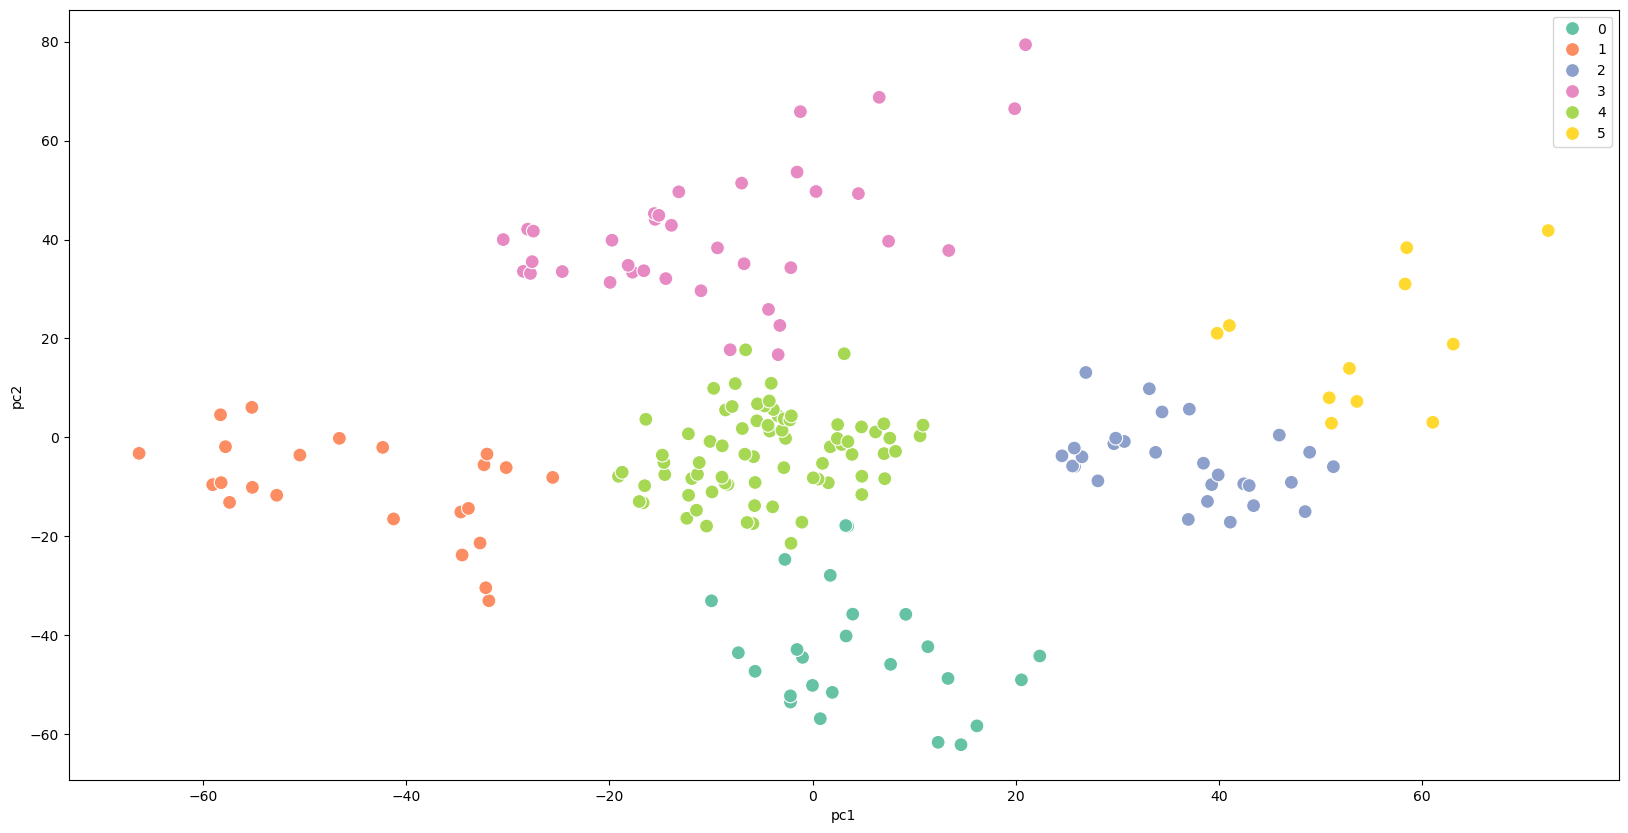

In [37]:
# looks better :)
plt.figure(figsize=(20, 10))
sns.scatterplot(x=pca_df['pc1'], y=pca_df['pc2'], hue=model.labels_, palette='Set2', s=100)